In [71]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [97]:
from src.montecarlostrategy import MonteCarloStrategy
from src.tdstrategy import TDStrategy
from src.player import Player
from src.step import step
from src.state import State, TerminalState
from src.card import Card, Color
from src.mse import mse
from src.action import Action
import numpy as np
import copy
import plotly.graph_objects as go
import plotly.express as px
import pickle

In [103]:
monte_carlo_player = Player(MonteCarloStrategy())

In [104]:
MAX_PATIENCE = 100

In [ ]:
patience = MAX_PATIENCE
iterations = 0
while patience > 0 or iterations <= 1e6:
    Q_prev = copy.deepcopy(monte_carlo_player.strategy.Q)
    state = State.init()
    while not isinstance(state, TerminalState):
        action = monte_carlo_player.take_action(state)
        state_prime, reward = step(state, action)
        monte_carlo_player.update(state, action, state_prime, reward)
        state = state_prime
    Q = copy.deepcopy(monte_carlo_player.strategy.Q)
    diff = mse(Q_prev, Q)
    Q_prev = Q
    iterations+=1
    patience -= 1
    if diff > 1e-10:
        patience = MAX_PATIENCE

In [102]:
Q1 = Q

In [33]:
Q_surface = np.zeros((22, 11))
for i in range(22):
    for j in range(1, 11):
        state = State(Card(j, Color.BLACK), i)
        Q_surface[i, j] = np.maximum(Q[(state, Action.STICK)], Q[(state, Action.HIT)])

In [45]:
x, y = np.linspace(1, 10, 10), np.linspace(1, 21, 21)

In [ ]:
Q_surface[1:,1:].shape

In [19]:
with open("data/monte_carlo_player.pickle", "wb") as ofile:
    pickle.dump(dict(monte_carlo_player.strategy.Q), ofile)

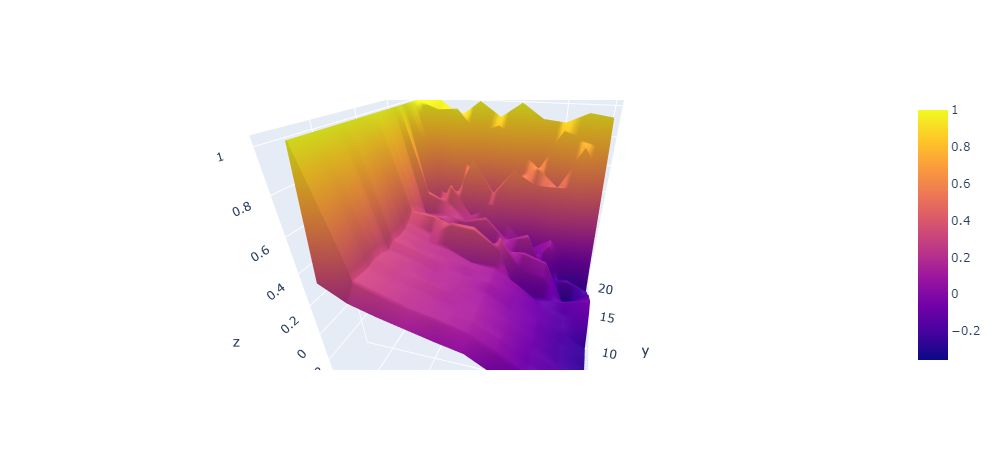

In [49]:
fig = go.Figure(data=[go.Surface(z=Q_surface[1:,1:], x=x, y=y)])
fig.show()

In [29]:
reward

-1

In [92]:
lambdas = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [93]:
mse_tracks = [[] for i in lambdas]

In [94]:
for k, lam in enumerate(lambdas):
    sarsa_player = Player(TDStrategy(lam=lam))
    for i in range(1000):
        state = State.init()
        while not isinstance(state, TerminalState):
            action = sarsa_player.take_action(state)
            state_prime, reward = step(state, action)
            sarsa_player.update(state, action, state_prime, reward)
            state = state_prime
        mse_tracks[k].append(mse(sarsa_player.strategy.Q, Q))

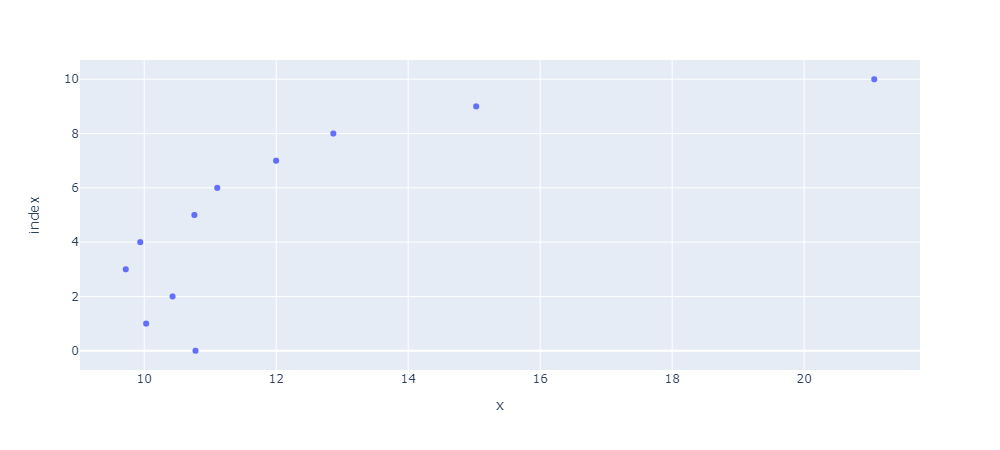

In [98]:
final_mses = [track[-1] for track in mse_tracks]
px.scatter(lambdas, final_mses)

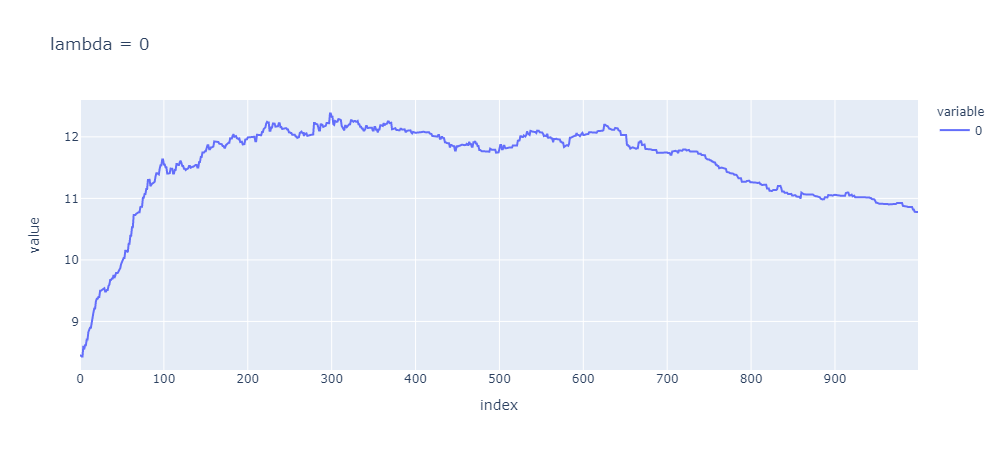

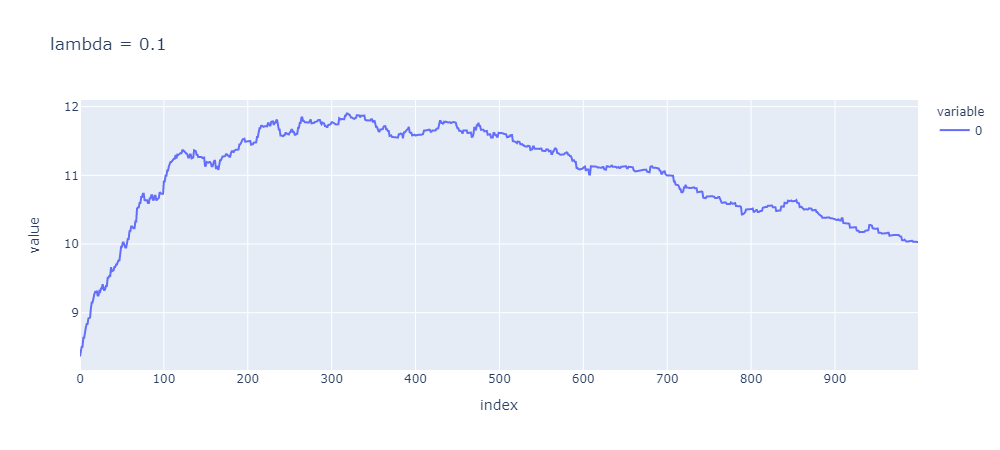

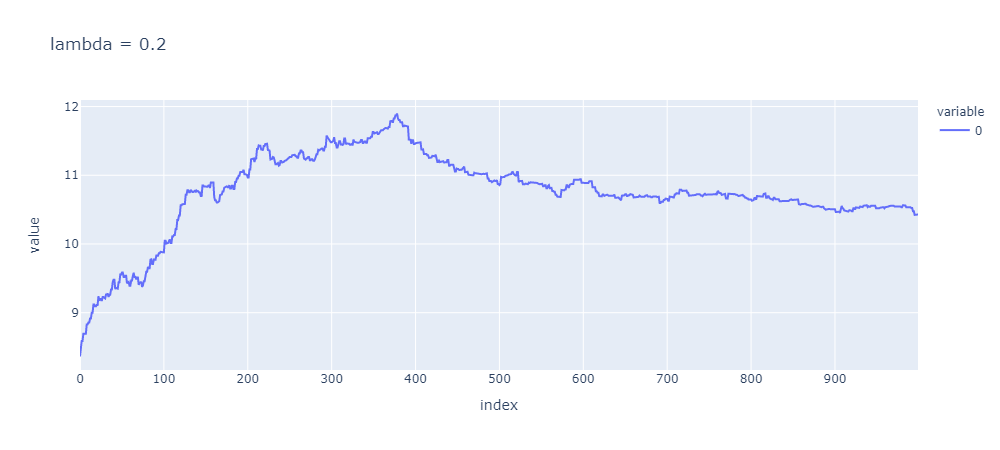

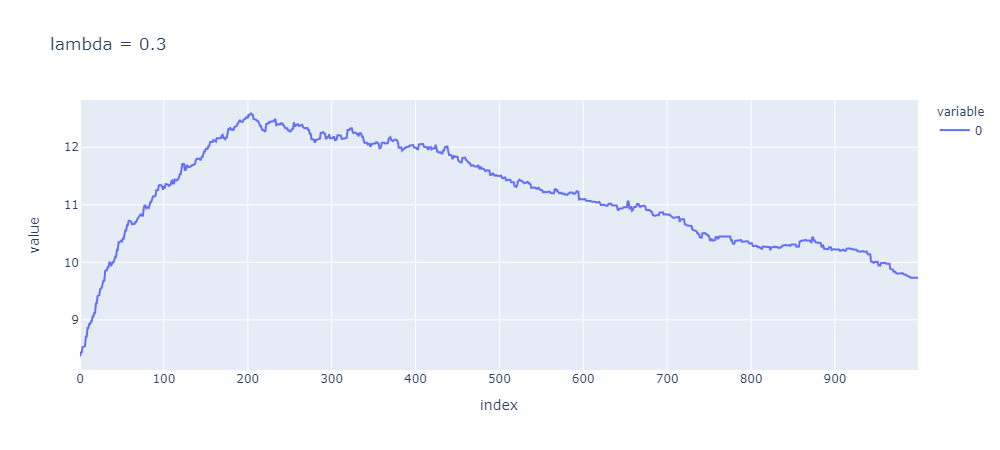

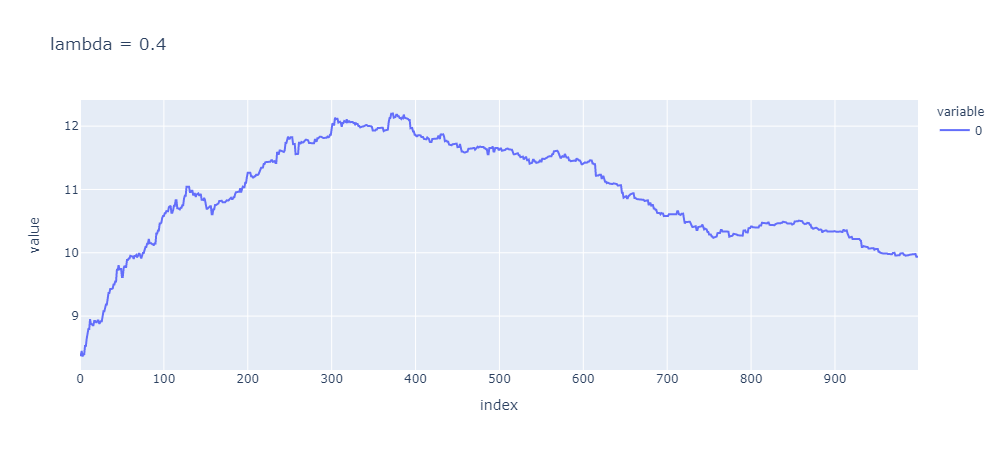

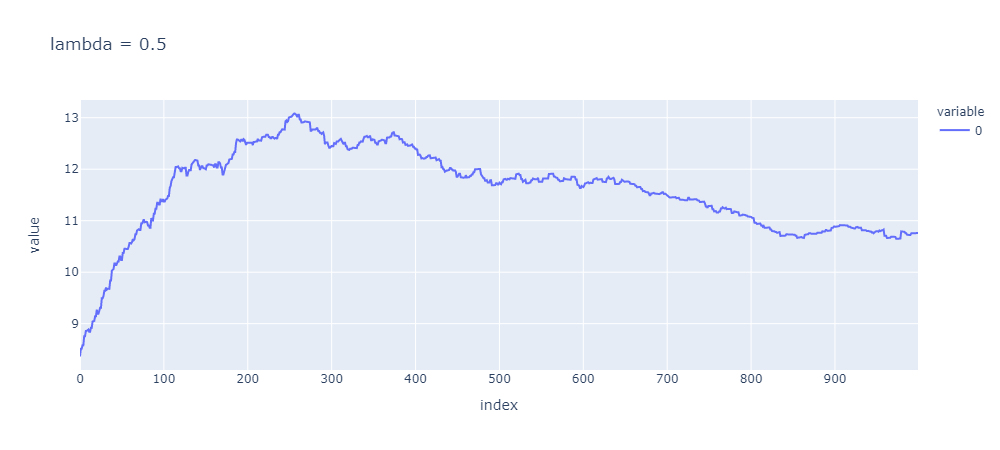

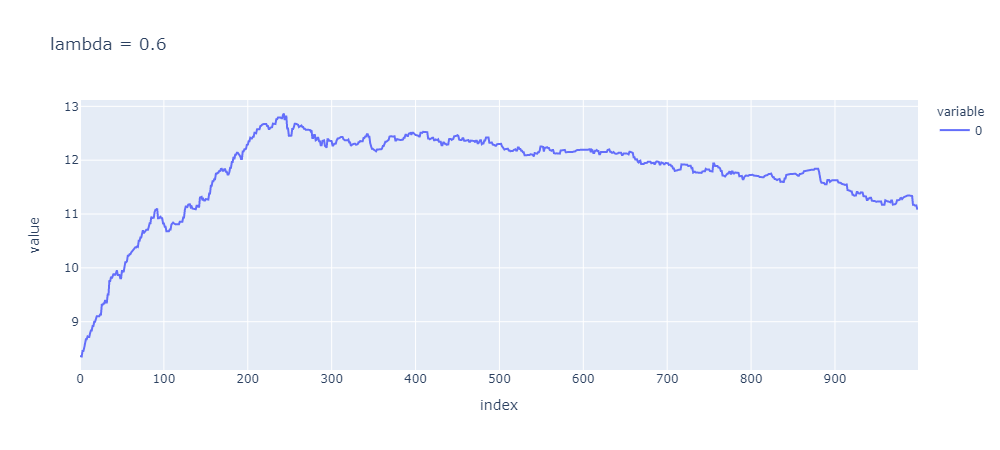

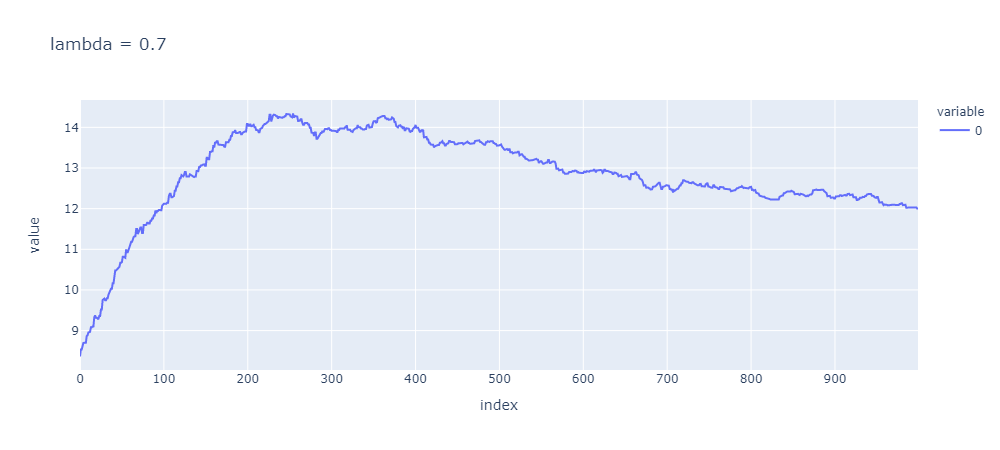

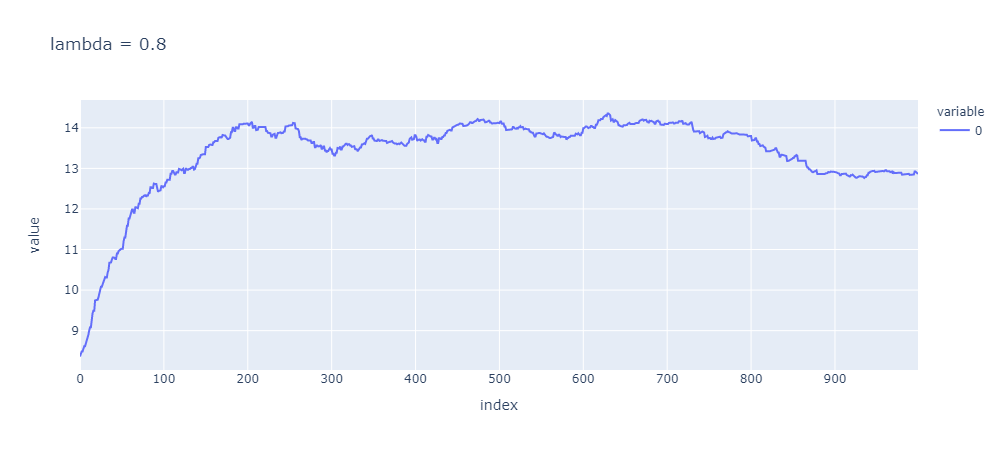

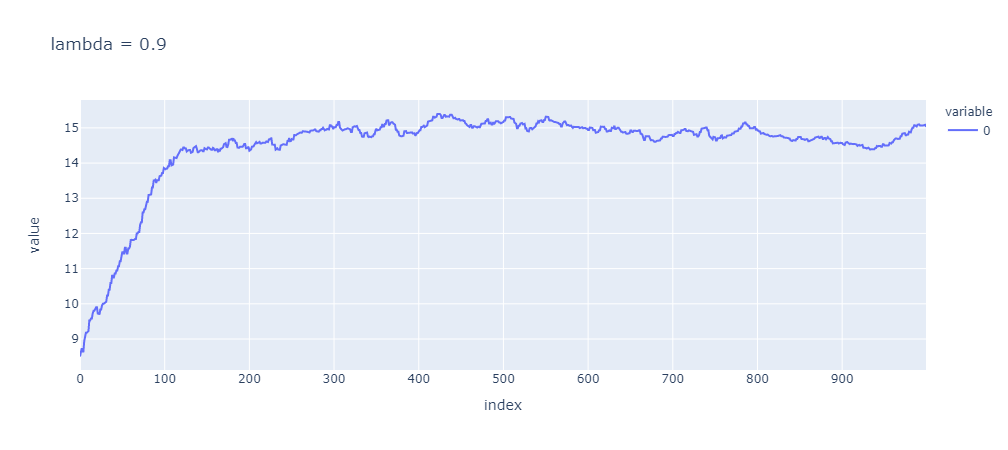

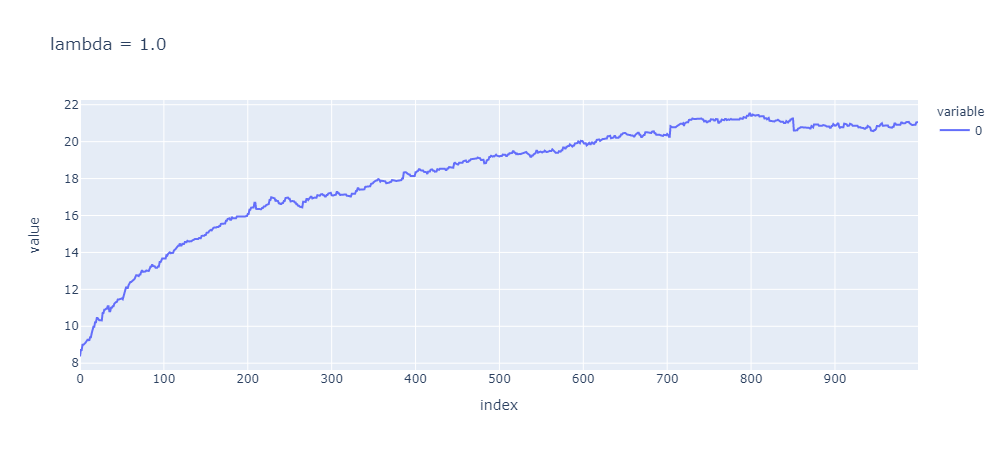

In [101]:
for i, track in enumerate(mse_tracks):
    fig = px.line(track, title = f"lambda = {lambdas[i]}")
    fig.show()

In [95]:
mse_tracks

[[8.44577209963585,
  8.44577209963585,
  8.430150330432214,
  8.430150330432214,
  8.603612816171461,
  8.545300081950886,
  8.61164821369373,
  8.61164821369373,
  8.706494173183597,
  8.706494173183597,
  8.82968300262029,
  8.867458189767488,
  8.898392136623732,
  8.898392136623732,
  9.006719636023389,
  9.102543200643233,
  9.143125873291012,
  9.20851512106287,
  9.20851512106287,
  9.330694095293506,
  9.368501332718319,
  9.368501332718319,
  9.39886799253225,
  9.39886799253225,
  9.500434714839752,
  9.500434714839752,
  9.508814322079441,
  9.508814322079441,
  9.531626313213218,
  9.539243260118553,
  9.486683402312803,
  9.486683402312803,
  9.509988558286485,
  9.509988558286485,
  9.576406517401733,
  9.597718461191105,
  9.674821161006578,
  9.674821161006578,
  9.695894806785553,
  9.695894806785553,
  9.756680491016787,
  9.70529825424173,
  9.7418311825478,
  9.789042481843595,
  9.789042481843595,
  9.789042481843595,
  9.81523586697321,
  9.833803156492548,
  9.8

In [88]:
mse_track_0 = []

In [90]:
mse_track_0

[8.320520798543042,
 8.320520798543042,
 8.440709102776394,
 8.440709102776394,
 8.551410714439578,
 8.572159771780623,
 8.572159771780623,
 8.700011894313072,
 8.780452603607833,
 8.723322069269459,
 8.665814902489181,
 8.708624481722026,
 8.708624481722026,
 8.809008503074239,
 8.87685928733999,
 8.901771536056275,
 8.845424607114218,
 8.845424607114218,
 8.99022294156569,
 9.041359768371787,
 9.10971187039123,
 9.181610959487722,
 9.181610959487722,
 9.244119046788303,
 9.244119046788303,
 9.344789222857512,
 9.325816463949932,
 9.325816463949932,
 9.42360442443142,
 9.370395954716292,
 9.370395954716292,
 9.486525233843942,
 9.486525233843942,
 9.593006146661107,
 9.636484447330794,
 9.636484447330794,
 9.666242643134481,
 9.666242643134481,
 9.643237508006779,
 9.643237508006779,
 9.675951097221853,
 9.675951097221853,
 9.665220249224404,
 9.726358490017049,
 9.74815309802053,
 9.74815309802053,
 9.830281009307422,
 9.874539908202404,
 9.895147588898782,
 9.950839611006908,
 9.950

In [65]:
sarsa_player.strategy.Q

defaultdict(<function src.tdstrategy.TDStrategy.__init__.<locals>.<lambda>()>,
            {(<src.state.State at 0x7f3a1db08cd0>, <Action.HIT: 0>): 0.0,
             (<src.state.State at 0x7f3a1dadaf90>, <Action.STICK: 1>): 0.0,
             (<src.state.State at 0x7f3a1dadaf50>, <Action.HIT: 0>): 0.0,
             (<src.state.State at 0x7f3a1dadad50>, <Action.STICK: 1>): 0.0,
             (<src.state.State at 0x7f3a1dadae50>, <Action.HIT: 0>): 0.0,
             (<src.state.State at 0x7f3a1dadac50>, <Action.STICK: 1>): 0.0,
             (<src.state.State at 0x7f3a1dadae10>, <Action.HIT: 0>): 0.0,
             (<src.state.State at 0x7f3a1dadad10>, <Action.STICK: 1>): 0.0,
             (<src.state.State at 0x7f3a1dadaed0>, <Action.HIT: 0>): 0.0,
             (<src.state.State at 0x7f3a1dadad90>, <Action.STICK: 1>): 0.0,
             (<src.state.State at 0x7f3a1db0b090>, <Action.HIT: 0>): 0.0,
             (<src.state.State at 0x7f3a1db0b110>, <Action.STICK: 1>): 0.0,
             (<src.st